In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from datetime import date
import calendar
web = pd.read_csv('data full metrics.csv')


C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
def day_value(x):
    y = []
    for i in x:
        if i == "Sunday":
            y.append(1)
        if i == "Monday":
            y.append(2)
        if i == "Tuesday":
            y.append(3)
        if i == "Wednesday":
            y.append(4)
        if i == "Thursday":
            y.append(5)
        if i == "Friday":
            y.append(6)            
        if i == "Saturday":
            y.append(7)            
    return(y)

def weekend_weekdays(x):
    y = []
    for i in x:
        if i == "Sunday":
            y.append("Weekend")
        if i == "Monday":
            y.append("Weekdays")
        if i == "Tuesday":
            y.append("Weekdays")
        if i == "Wednesday":
            y.append("Weekdays")
        if i == "Thursday":
            y.append("Weekdays")
        if i == "Friday":
            y.append("Weekdays")            
        if i == "Saturday":
            y.append("Weekend")            
    return(y)

In [3]:
%matplotlib inline

In [4]:
tgl = web['Date']

import datetime
tanggal = []
for i in tgl:
    year, month, day = (int(x) for x in i.split('/'))    
    ans = datetime.date(year, month, day)
    my_date = ans
    tanggal.append(calendar.day_name[my_date.weekday()])
web['Hari'] = tanggal
web['Day Value'] = day_value(tanggal)

In [5]:
web['Day Status'] = weekend_weekdays(tanggal)
web.pivot_table(index=['Day Status'],aggfunc=sum,values=["Clicks","Impressions","PC","PV"])


,Clicks,Impressions,PC,PV
Day Status,,,,
Weekdays,691.0,627234.0,12.0,30.0
Weekend,422.0,552312.0,0.0,2.0


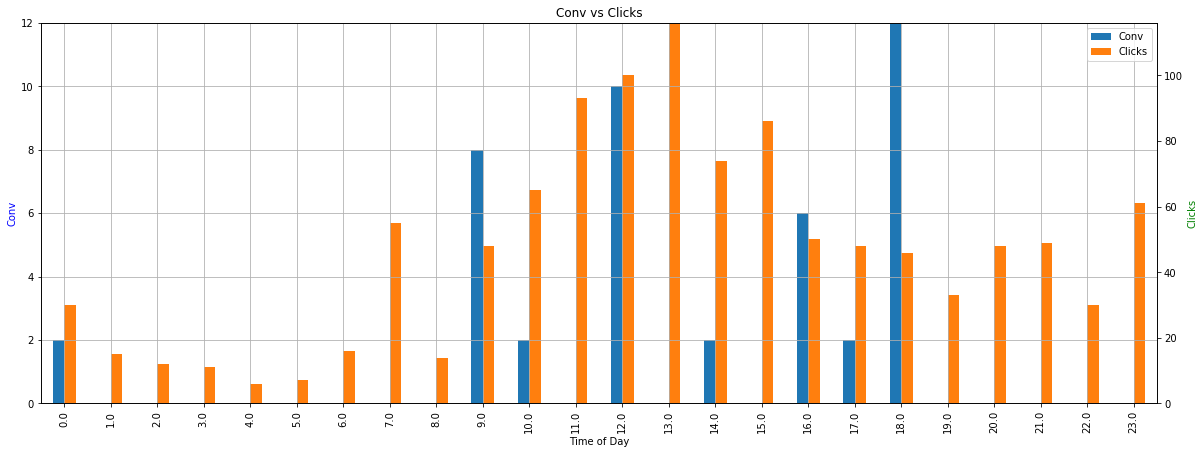

In [6]:
k = 'Time of Day'
i,j= 'Conv','Clicks'
tgl = web.pivot_table(index=[k],aggfunc=sum,values=["Clicks","Impressions","Spend", "PC","PV"])#.reset_index()
tgl["Conv"] = tgl["PC"]+tgl["PV"]
tgl['CTR'] = tgl["Clicks"]/tgl["Impressions"]*100
tgl['CPM'] = tgl["Spend"]/(tgl["Impressions"]/1000)
tgl["CPC"] = tgl["Spend"]/tgl["Clicks"]
tgl["CPA"] = tgl["Spend"]/tgl["Conv"]
tgl# = tgl[tgl['Conv']==0].sort_values(by='Spend',ascending=False)
import pylab as pl
df = tgl[[i,j]]
ax = df.plot(kind="bar",figsize=(20,7),grid=True)
ax.set_ylim(0, tgl[i].max())
ax2 = ax.twinx()
plt.title(i +' vs '+ j)
ax.set_xlabel(k)
ax.set_ylabel(i, color='b')
ax2.set_ylabel(j, color='g')
ax.legend( loc='best')
#legend( ('label1', 'label2', 'label3'), loc='upper left')

for r in ax.patches[len(df):]:
    r.set_transform(ax2.transData)
ax2.set_ylim(0, tgl[j].max())
plt.show()

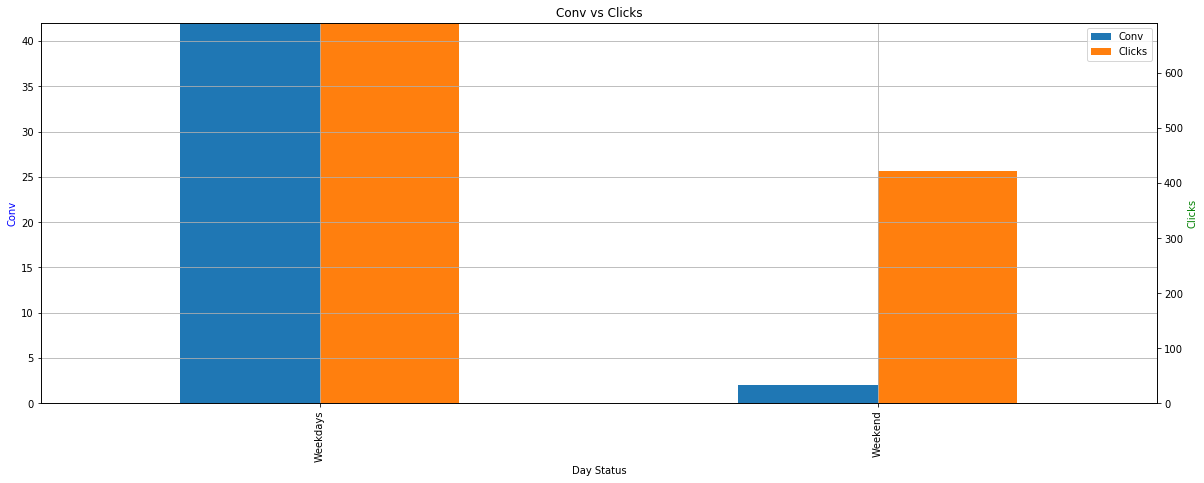

In [7]:
k = 'Day Status'
i,j= 'Conv','Clicks'
tgl = web.pivot_table(index=[k],aggfunc=sum,values=["Clicks","Impressions","Spend", "PC","PV"])
tgl["Conv"] = tgl["PC"]+tgl["PV"]
tgl['CTR'] = tgl["Clicks"]/tgl["Impressions"]*100
tgl['CPM'] = tgl["Spend"]/(tgl["Impressions"]/1000)
tgl["CPC"] = tgl["Spend"]/tgl["Clicks"]
tgl["CPA"] = tgl["Spend"]/tgl["Conv"]
import pylab as pl
df = tgl[[i,j]]
ax = df.plot(kind="bar",figsize=(20,7),grid=True) ## adjust size of graph
ax.set_ylim(0, tgl[i].max())
ax2 = ax.twinx()
plt.title(i +' vs '+ j)
ax.set_xlabel(k)
ax.set_ylabel(i, color='b')
ax2.set_ylabel(j, color='g')
ax.legend( loc='best') ## choose legend position

for r in ax.patches[len(df):]:
    r.set_transform(ax2.transData)
ax2.set_ylim(0, tgl[j].max())
plt.show()

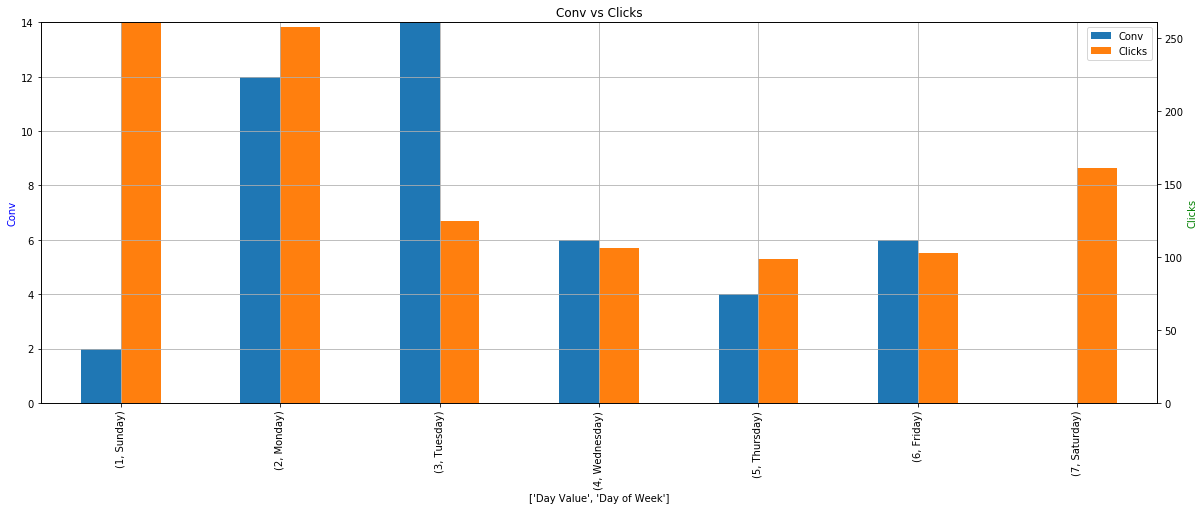

In [8]:
k = ['Day Value','Day of Week']
i,j= 'Conv','Clicks'
tgl = web.pivot_table(index=k,aggfunc=sum,values=["Clicks","Impressions","Spend", "PC","PV"])
tgl["Conv"] = tgl["PC"]+tgl["PV"]
tgl['CTR'] = tgl["Clicks"]/tgl["Impressions"]*100
tgl['CPM'] = tgl["Spend"]/(tgl["Impressions"]/1000)
tgl["CPC"] = tgl["Spend"]/tgl["Clicks"]
tgl["CPA"] = tgl["Spend"]/tgl["Conv"]
import pylab as pl
df = tgl[[i,j]]
ax = df.plot(kind="bar",figsize=(20,7),grid=True) ## adjust size of graph
ax.set_ylim(0, tgl[i].max())
ax2 = ax.twinx()
plt.title(i +' vs '+ j)
ax.set_xlabel(k)
ax.set_ylabel(i, color='b')
ax2.set_ylabel(j, color='g')
ax.legend( loc='best') ## choose legend position

for r in ax.patches[len(df):]:
    r.set_transform(ax2.transData)
ax2.set_ylim(0, tgl[j].max())
plt.show()